In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from astroML.plotting import scatter_contour
import seaborn as sns
import astropy
from astropy.io import fits
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.coordinates import SkyCoord
cosmo = FlatLambdaCDM(H0=73. * u.km / u.s / u.Mpc, Om0=0.31)
c = 299792.458

In [2]:
fuji_pv = pd.read_csv("DESI_FP_logdists_fiducial.csv")
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey,program,targetid.1,...,ei,s,es,absmag_r,Sn,logdist,logdist_err,logdist_alpha,pv,pverr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,0.000279,2.154577,0.004325,-19.925132,1.000000,0.040823,0.100876,-0.211552,715.900844,1769.034190
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,0.000122,2.422567,0.002484,-22.520143,1.000000,0.184259,0.100492,0.135647,3630.261093,1979.890546
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,0.000486,2.177125,0.004492,-19.991908,1.000000,-0.100140,0.101378,-0.438164,-2132.960665,2159.343503
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,0.000241,2.298011,0.001769,-20.724064,1.000000,0.002332,0.104726,0.319311,20.932642,939.867093
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,0.000123,2.436203,0.002673,-20.874334,1.000000,-0.065115,0.101095,-0.311079,-1099.996339,1707.819657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186,39632986789905375,570,252.485796,35.198279,39632986789905375,3347,9429,sv3,bright,39632986789905375,...,0.003336,1.892140,0.148222,-19.633656,1.000000,0.023497,0.184570,-0.998433,1567.827904,12315.564270
4187,39627652587330772,44,36.125245,-5.566223,39627652587330772,933,17683,sv1,bright,39627652587330772,...,0.000611,2.048037,0.049742,-19.271366,0.685189,-0.052879,0.114779,-0.573969,-1610.026917,3494.709956
4188,39627628545578443,30,36.097224,-6.412998,39627628545578443,922,17680,sv1,bright,39627628545578443,...,0.000820,2.072414,0.050651,-19.378259,0.793512,-0.155076,0.118115,-0.618295,-5257.334901,4004.290864
4189,39633307725466372,337,173.525018,53.919783,39633307725466372,2657,5976,sv2,bright,39633307725466372,...,0.002153,2.167417,0.160353,-19.978571,1.000000,-0.239747,0.200601,-1.013735,-11674.944029,9768.632841


In [3]:
sdss_pv = pd.read_csv("sdss_pv.csv")
sdss_pv

,PGC,coords,objid,specObjId,plate,RA,Dec,l,b,deVMag_g,...,ei,s,es,Sn,logdist,logdist_err,logdist_alpha,logdist_corr,logdist_corr_err,logdist_corr_alpha
0,1233903,J112934.7+023941,1237654030328922362,576621864177133568,512,172.394795,2.661484,260.750209,58.659639,17.54882,...,0.01661,2.20262,0.01513,1.00000,0.132164,0.102798,-0.576760,0.108613,0.102597,-0.680995
1,2180626,J161531.4+412425,1237659329777107022,1318559404106213120,1171,243.880668,41.407020,65.575776,46.176954,15.44160,...,0.00634,2.29344,0.00724,0.40271,0.046916,0.095898,-0.375417,0.027767,0.093567,-0.349573
2,3112054,J134427.9-001000,1237671957519794394,336665265779533824,299,206.116130,-0.166644,330.119970,59.876092,17.43604,...,0.01837,2.29858,0.01343,1.00000,0.021033,0.104337,-0.530621,0.003093,0.105062,-0.623428
3,3124224,J114611.6+032743,1237651755082580040,578859370373212160,514,176.548500,3.461874,266.736098,61.659548,17.88573,...,0.02286,2.21004,0.02223,0.81233,-0.018901,0.107711,-0.519613,-0.047273,0.108915,-0.598469
4,3122691,J114947.6+025635,1237671129127059618,578885758652278784,514,177.448413,2.942938,268.922247,61.674524,17.43210,...,0.01599,2.26756,0.01529,0.52220,-0.067468,0.104233,-0.550741,-0.087197,0.104653,-0.649119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34054,1824143,J135945.7+280117,1237665429169307943,2384816045723510784,2118,209.940589,28.021406,40.259214,74.845291,17.31200,...,0.01266,2.23033,0.01420,0.92185,0.085468,0.102212,-0.580367,0.139850,0.096897,-0.410401
34055,56786,J160218.0+162158,1237665531723317440,2472613143914768384,2196,240.575050,16.366201,29.418294,44.669599,15.29424,...,0.00651,2.38024,0.00811,1.00000,-0.060779,0.098943,-0.584279,-0.065817,0.095355,-0.438518
34056,58348,J162944.9+404842,1237655373573062713,919958120371873792,817,247.437155,40.811611,64.680181,43.506581,12.81371,...,0.00446,2.46024,0.00579,1.00000,0.225224,0.095139,-0.197331,0.221563,0.091369,-0.366103
34057,58191,J162741.1+405537,1237655472357114000,918822324826826880,816,246.921342,40.926966,64.835897,43.897452,13.70092,...,0.00441,2.39683,0.00828,1.00000,0.026271,0.096306,-0.476559,-0.000887,0.093916,-0.502596


In [4]:
#fuji_sdss = pd.merge(fuji_pv,sdss_pv, left_on = )
#print (sdss_pv['RA'])
delta_degree=(1/3600.)
coord_sdss = SkyCoord(ra = np.array(sdss_pv['RA'])*u.degree, dec = np.array(sdss_pv['Dec'])*u.degree)
coord_fuji = SkyCoord(ra = np.array(fuji_pv['ra_1'])*u.degree, dec = np.array(fuji_pv['dec_1'])*u.degree)
#print (coord_sdss)
idx, d2d, d3d = coord_fuji.match_to_catalog_sky(coord_sdss)
sdss_overlap = (d2d < (delta_degree*u.degree))
sdss_overlap_indices = idx[sdss_overlap]
print(len(sdss_overlap_indices))
#print(sdss_overlap_indices)
print(len(idx),idx[0],sdss_pv[idx[0]:idx[0]+1],d2d[0])
print(idx)

926
4191 6192           PGC            coords                objid            specObjId  \
6192  4537865  J124847.9+270157  1237667322722910284  2522100517862139904   

      plate          RA        Dec           l          b  deVMag_g  ...  \
6192   2240  192.199502  27.032552  222.041301  89.404581  17.54655  ...   

           ei        s       es       Sn   logdist  logdist_err  \
6192  0.02241  2.16984  0.01945  0.50084 -0.000251     0.104901   

      logdist_alpha  logdist_corr  logdist_corr_err  logdist_corr_alpha  
6192       -0.57045     -0.026521          0.105119           -0.670825  

[1 rows x 46 columns] 0d08m58.76369507s
[ 6192 33995  3391 ...  7038 25868  7038]


In [5]:
fuji_pv['idx'] = idx
fuji_pv['d2d'] = d2d.value
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey,program,targetid.1,...,es,absmag_r,Sn,logdist,logdist_err,logdist_alpha,pv,pverr,idx,d2d
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,0.004325,-19.925132,1.000000,0.040823,0.100876,-0.211552,715.900844,1769.034190,6192,0.149657
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,0.002484,-22.520143,1.000000,0.184259,0.100492,0.135647,3630.261093,1979.890546,33995,0.020194
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,0.004492,-19.991908,1.000000,-0.100140,0.101378,-0.438164,-2132.960665,2159.343503,3391,0.000032
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,0.001769,-20.724064,1.000000,0.002332,0.104726,0.319311,20.932642,939.867093,21262,0.237557
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,0.002673,-20.874334,1.000000,-0.065115,0.101095,-0.311079,-1099.996339,1707.819657,32909,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186,39632986789905375,570,252.485796,35.198279,39632986789905375,3347,9429,sv3,bright,39632986789905375,...,0.148222,-19.633656,1.000000,0.023497,0.184570,-0.998433,1567.827904,12315.564270,12827,0.013831
4187,39627652587330772,44,36.125245,-5.566223,39627652587330772,933,17683,sv1,bright,39627652587330772,...,0.049742,-19.271366,0.685189,-0.052879,0.114779,-0.573969,-1610.026917,3494.709956,7941,80.027029
4188,39627628545578443,30,36.097224,-6.412998,39627628545578443,922,17680,sv1,bright,39627628545578443,...,0.050651,-19.378259,0.793512,-0.155076,0.118115,-0.618295,-5257.334901,4004.290864,7038,80.393518
4189,39633307725466372,337,173.525018,53.919783,39633307725466372,2657,5976,sv2,bright,39633307725466372,...,0.160353,-19.978571,1.000000,-0.239747,0.200601,-1.013735,-11674.944029,9768.632841,25868,0.278661


In [6]:
fuji_sdss_n = pd.merge(fuji_pv, sdss_pv, left_on='idx', right_index = True)
fuji_sdss = fuji_sdss_n.drop(fuji_sdss_n[fuji_sdss_n['d2d'] > (0.1/3600.)].index)
fuji_sdss

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey,program,targetid.1,...,ei_y,s_y,es_y,Sn_y,logdist_y,logdist_err_y,logdist_alpha_y,logdist_corr,logdist_corr_err,logdist_corr_alpha
260,39628417133448023,529,193.592834,27.084179,39628417133448023,3418,28149,sv3,bright,39628417133448023,...,0.00729,2.17579,0.00819,0.17525,-0.064625,0.096382,-0.466227,0.001065,0.092887,-0.485523
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,0.00431,2.41535,0.00538,1.00000,-0.001810,0.096055,-0.397190,0.038192,0.092604,-0.463153
14,39628438604091708,1276,194.124215,27.939990,39628438604091708,3319,10400,sv3,bright,39628438604091708,...,0.00720,2.32626,0.00590,0.44381,-0.170886,0.098173,-0.549678,-0.149937,0.095102,-0.496969
9,39632940354767051,233,155.787603,32.907518,39632940354767051,764,5322,sv1,bright,39632940354767051,...,0.00730,2.31762,0.00928,1.00000,-0.011851,0.097986,-0.566901,-0.017032,0.095540,-0.611431
10,39633207917808010,75,163.673104,47.451925,39633207917808010,830,5907,sv1,bright,39633207917808010,...,0.00892,2.01695,0.01267,0.18011,0.082435,0.096777,-0.257630,0.096190,0.086367,-0.210012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,39633123280945563,1142,247.703678,42.392285,39633123280945563,3340,9984,sv3,bright,39633123280945563,...,0.01345,2.24241,0.01450,1.00000,0.134279,0.102902,-0.570189,0.121443,0.105674,-0.674806
3956,39627811408840959,74,150.358020,1.038920,39627811408840959,3278,27239,sv3,bright,39627811408840959,...,0.02337,2.22808,0.01501,1.00000,-0.026997,0.105730,-0.499645,-0.024988,0.097183,-0.479355
3966,39627786985408035,75,134.577750,0.104381,39627786985408035,1370,21845,sv1,bright,39627786985408035,...,0.02011,2.13913,0.01791,0.64823,-0.042501,0.105059,-0.552609,-0.065872,0.105575,-0.648807
3979,39627884997904170,645,218.374730,3.905292,39627884997904170,3368,25982,sv3,bright,39627884997904170,...,0.01777,2.24813,0.01876,0.88026,0.052369,0.105099,-0.555680,0.055738,0.096673,-0.529588


In [7]:
# fuji_sdss = pd.read_csv("fuji_pv_vs_sdss.csv")
# fuji_sdss

In [8]:
fuji_sdss.columns.values

array(['#fibermap_targetid', 'fibermap_i', 'ra_1', 'dec_1', 'targetid',
       'id', 'healpix', 'survey', 'program', 'targetid.1', 'z_x', 'zerr',
       'zwarn', 'spectype', 'subtype', 'deltachi2', 'healpix_id',
       'targetid.2', 'target_ra', 'target_dec', 'obsconditions',
       'release', 'brickid_1', 'brick_objid', 'fiberflux_ivar_g',
       'fiberflux_ivar_r', 'fiberflux_ivar_z', 'morphtype', 'flux_g',
       'flux_r', 'flux_z', 'flux_ivar_g', 'flux_ivar_r', 'flux_ivar_z',
       'ebv', 'flux_w1', 'flux_w2', 'flux_ivar_w1', 'flux_ivar_w2',
       'fiberflux_g', 'fiberflux_r', 'fiberflux_z', 'fibertotflux_g',
       'fibertotflux_r', 'fibertotflux_z', 'sersic_1', 'coadd_numexp',
       'coadd_exptime', 'coadd_numnight', 'coadd_numtile', 'healpix_id.1',
       'objid_1', 'brickid.1', 'brickname_1', 'ra.1', 'dec.1',
       'ppxf_sigma', 'ppxf_sigma_error', 'DER_SNR', 'snr_ppxf', 'OBJID_2',
       'BRICKID_2', 'BRICKNAME_2', 'RA_2', 'DEC_2', 'TYPE', 'SERSIC_2',
       'Z_PHOT_MEDIAN

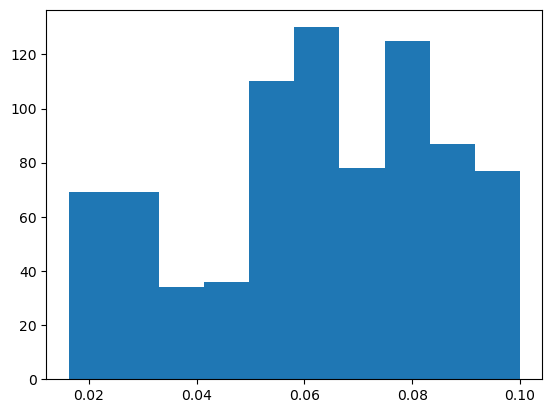

In [9]:
plt.hist(fuji_sdss.zcmb_group_x)
plt.show()

In [10]:
print (cosmo.comoving_distance(0.02))

81.75149195658865 Mpc


In [11]:
pull_pipe = (fuji_sdss.logdist_y - fuji_sdss.logdist_x)/(np.sqrt((fuji_sdss.logdist_err_x*fuji_sdss.logdist_err_x)+(fuji_sdss.logdist_err_y*fuji_sdss.logdist_err_y)))

In [12]:
diff = fuji_sdss.logdist_x - fuji_sdss.logdist_y
diff_err = np.sqrt((fuji_sdss.logdist_err_x**2)+(fuji_sdss.logdist_err_y**2))
print (np.average(diff, weights=1./diff_err))
print (np.mean(diff))
print (np.std(diff)/np.sqrt(len(diff)))
delta_eta = np.average(diff, weights=1./diff_err**2)
print (round(np.average(diff, weights=1./diff_err**2),4),"+/-",round(np.std(diff)/np.sqrt(len(diff)),4))
print (delta_eta)

0.011568590762885276
0.012208255329686002
0.0017504909008418685
0.0109 +/- 0.0018
0.010933309415534479


In [13]:
fuji_pv["logdist_corr"] = fuji_pv["logdist"] - delta_eta
fuji_pv["logdist_err_corr"] = np.sqrt(fuji_pv["logdist_err"]**2 + 0.0017**2)
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey,program,targetid.1,...,Sn,logdist,logdist_err,logdist_alpha,pv,pverr,idx,d2d,logdist_corr,logdist_err_corr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,1.000000,0.040823,0.100876,-0.211552,715.900844,1769.034190,6192,0.149657,0.029889,0.100890
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,1.000000,0.184259,0.100492,0.135647,3630.261093,1979.890546,33995,0.020194,0.173326,0.100507
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,1.000000,-0.100140,0.101378,-0.438164,-2132.960665,2159.343503,3391,0.000032,-0.111073,0.101393
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,1.000000,0.002332,0.104726,0.319311,20.932642,939.867093,21262,0.237557,-0.008601,0.104740
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,1.000000,-0.065115,0.101095,-0.311079,-1099.996339,1707.819657,32909,0.000008,-0.076048,0.101109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186,39632986789905375,570,252.485796,35.198279,39632986789905375,3347,9429,sv3,bright,39632986789905375,...,1.000000,0.023497,0.184570,-0.998433,1567.827904,12315.564270,12827,0.013831,0.012563,0.184578
4187,39627652587330772,44,36.125245,-5.566223,39627652587330772,933,17683,sv1,bright,39627652587330772,...,0.685189,-0.052879,0.114779,-0.573969,-1610.026917,3494.709956,7941,80.027029,-0.063812,0.114791
4188,39627628545578443,30,36.097224,-6.412998,39627628545578443,922,17680,sv1,bright,39627628545578443,...,0.793512,-0.155076,0.118115,-0.618295,-5257.334901,4004.290864,7038,80.393518,-0.166009,0.118127
4189,39633307725466372,337,173.525018,53.919783,39633307725466372,2657,5976,sv2,bright,39633307725466372,...,1.000000,-0.239747,0.200601,-1.013735,-11674.944029,9768.632841,25868,0.278661,-0.250681,0.200608


In [14]:
omega_m = 0.31               # Matter density
deccel = 3.0*omega_m/2.0 - 1.0
czmod = c*fuji_pv["zcmb"].to_numpy()*(1.0 + 0.5*(1.0 - deccel)*(fuji_pv["zcmb"].to_numpy()) - (1.0/6.0)*(2.0 - deccel - 3.0*deccel*deccel)*(fuji_pv["zcmb"].to_numpy())**2)
fuji_pv["pv_corr"] = np.log(10.0)*czmod/(1.0 + czmod/c)*fuji_pv["logdist_corr"].to_numpy()
fuji_pv["pverr_corr"] = np.log(10.0)*czmod/(1.0 + czmod/c)*fuji_pv["logdist_err_corr"].to_numpy()
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey,program,targetid.1,...,logdist_err,logdist_alpha,pv,pverr,idx,d2d,logdist_corr,logdist_err_corr,pv_corr,pverr_corr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,0.100876,-0.211552,715.900844,1769.034190,6192,0.149657,0.029889,0.100890,524.165632,1769.285380
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,0.100492,0.135647,3630.261093,1979.890546,33995,0.020194,0.173326,0.100507,3414.854109,1980.173823
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,0.101378,-0.438164,-2132.960665,2159.343503,3391,0.000032,-0.111073,0.101393,-2365.838643,2159.647080
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,0.104726,0.319311,20.932642,939.867093,21262,0.237557,-0.008601,0.104740,-77.188733,939.990915
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,0.101095,-0.311079,-1099.996339,1707.819657,32909,0.000008,-0.076048,0.101109,-1284.695449,1708.061104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186,39632986789905375,570,252.485796,35.198279,39632986789905375,3347,9429,sv3,bright,39632986789905375,...,0.184570,-0.998433,1567.827904,12315.564270,12827,0.013831,0.012563,0.184578,838.296840,12316.086652
4187,39627652587330772,44,36.125245,-5.566223,39627652587330772,933,17683,sv1,bright,39627652587330772,...,0.114779,-0.573969,-1610.026917,3494.709956,7941,80.027029,-0.063812,0.114791,-1942.917085,3495.093250
4188,39627628545578443,30,36.097224,-6.412998,39627628545578443,922,17680,sv1,bright,39627628545578443,...,0.118115,-0.618295,-5257.334901,4004.290864,7038,80.393518,-0.166009,0.118127,-5627.991997,4004.705590
4189,39633307725466372,337,173.525018,53.919783,39633307725466372,2657,5976,sv2,bright,39633307725466372,...,0.200601,-1.013735,-11674.944029,9768.632841,25868,0.278661,-0.250681,0.200608,-12207.362099,9768.983616


In [15]:
fuji_pv.to_csv('fuji_pv_new.csv',index=False,header=True)

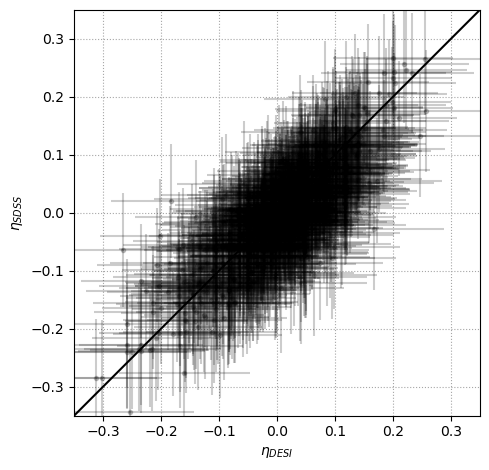

In [16]:
fig, ax = plt.subplots()
ax.set_ylim(-0.35,0.35)
ax.set_xlim(-0.35,0.35)
xxx=[-0.4,0.4];yyy=[-0.4,0.4]
ax.errorbar(fuji_sdss.logdist_x,fuji_sdss.logdist_y,xerr=fuji_sdss.logdist_err_x,yerr=fuji_sdss.logdist_err_y,fmt=".k",alpha=0.2)
ax.scatter(fuji_sdss.logdist_x,fuji_sdss.logdist_y,color='black',alpha=0.2,edgecolor='none',s=3.5)
ax.plot(xxx,yyy,color="black")
ax.set_aspect(1)
ax.set_xlabel(r'$\eta_{DESI}$')
ax.set_ylabel(r'$\eta_{SDSS}$')
plt.grid(visible=True, which='both', color='0.65',linestyle=':')
#plt.legend()#,frameon=False)
plt.tight_layout()
plt.savefig('fuji_vs_sdss_logdist.png')
plt.savefig('fuji_vs_sdss_logdist.pdf')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


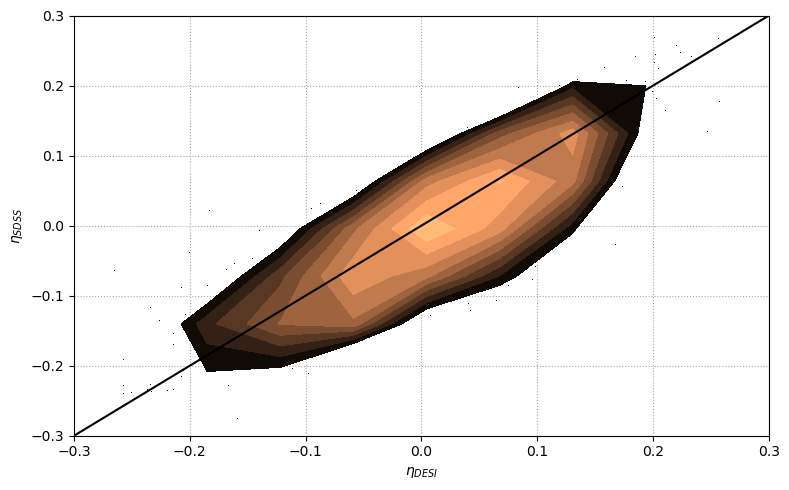

In [17]:
xfit = np.linspace(-0.3, 0.3)
# sfit = np.linspace(1.5,3.0)
# ifit = np.linspace(0.8,4.5)
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-0.3,0.3)
ax.set_ylim(-0.3,0.3)
scatter_contour(fuji_sdss.logdist_x, fuji_sdss.logdist_y, threshold=10, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=10),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.copper))
ax.plot(xfit,xfit,c='black')#,label='FP parameters (Said et al. 2020)')
#ax.plot(xfit, (1.32696*sfit) - (0.785787*ifit) - 0.467, '-r',label='3D Gaussian')
# ax.text(-0.35,1.125-0.2,"3D Gaussian fit for Fuji r-band Fundamental Plane using "+str(len(r_desi))+" galaxies:")
# ax.text(-0.35,1.0-0.2, r'$a = 1.097, b = -0.790, c = -0.004$')
# ax.text(-0.35,0.875-0.2, r'$\bar r=0.193, \bar s = 2.012, \bar i = 2.554$')
# ax.text(-0.35,0.75-0.2, r'$\sigma_1 = 0.044, \sigma_2 = 0.418, \sigma_3 = 0.342$')
ax.set_xlabel(r'$\eta_{DESI}$')
ax.set_ylabel(r'$\eta_{SDSS}$')
#plt.xticks(color='w')
#plt.yticks(color='w')
plt.legend(framealpha=0.0)
ax.grid(visible=True, which='both', color='0.65',linestyle=':')
plt.tight_layout()
plt.savefig('fuji_vs_sdss_contour.png')
#plt.savefig('FP_fuji.pdf')
plt.show()

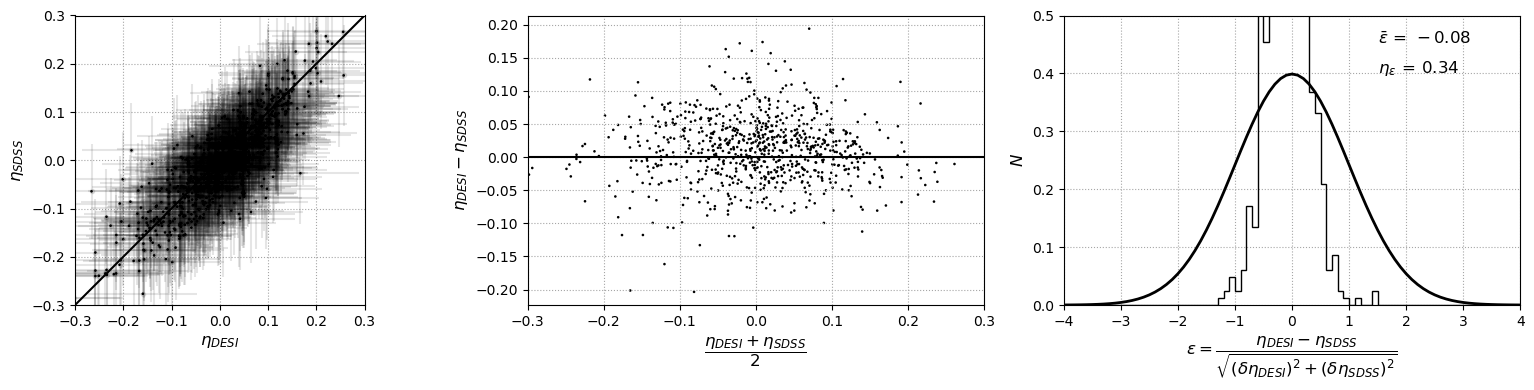

In [18]:
f_1, ((ax1, ax2, ax3)) = plt.subplots(nrows=1,ncols=3, figsize=(16, 4),sharex=False, sharey=False)
ax1.set_ylim(-0.3,0.3)
ax1.set_xlim(-0.3,0.3)
xxx=[-0.3,0.3];yyy=[-0.3,0.3]
ax1.errorbar(fuji_sdss.logdist_x,fuji_sdss.logdist_y,xerr=fuji_sdss.logdist_err_x,yerr=fuji_sdss.logdist_err_y,fmt=".k",alpha=0.1)
ax1.scatter(fuji_sdss.logdist_x,fuji_sdss.logdist_y,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.grid(visible=True, which='both', color='0.65',linestyle=':')
ax1.set_aspect(1)
ax1.set_xlabel(r'$\eta_{DESI}$',size=12)
ax1.set_ylabel(r'$\eta_{SDSS}$',size=12)

#ax2.set_ylim(-200,200)
ax2.set_xlim(-0.3,0.3)
ax2.scatter(((fuji_sdss.logdist_x+fuji_sdss.logdist_y)/2.),fuji_sdss.logdist_x-fuji_sdss.logdist_y,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(visible=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\dfrac{\eta_{DESI} + \eta_{SDSS}}{2}$',size=12)
ax2.set_ylabel(r'$\eta_{DESI} - \eta_{SDSS}$',size=12)
#ax2.set_aspect(1)

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = plt.hist(pull_pipe,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='etastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\eta$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(visible=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon = \dfrac{\eta_{DESI} - \eta_{SDSS}}{\sqrt{(\delta \eta_{DESI})^2 + (\delta \eta_{SDSS})^2}}$',size=12)
ax3.set_ylabel(r'$N$',size=12)
ax3.text(1.5,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe))+'$',size=12)#, fontname = 'Times New Roman',size=20)
ax3.text(1.5,0.4,r'$\eta_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe))+'$',size=12)

plt.tight_layout()
plt.savefig('fuji_pv_sdss.png')
plt.savefig('fuji_pv_sdss.pdf')
plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1877: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1883: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/var/folders/gm/yvqnp52d0dg0c6rgvbs833xh0000gp/T/ipykernel_21904/2294162658.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


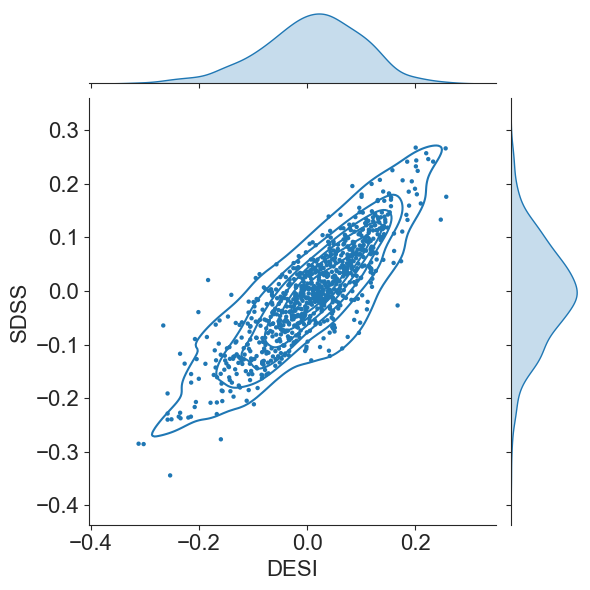

In [19]:
#sns.set(color_codes=True)
sns.set_style("ticks")
x = fuji_sdss.logdist_x
y = fuji_sdss.logdist_y
data = np.column_stack((x,y))
df = pd.DataFrame(data, columns=["x", "y"])
g = sns.JointGrid(x="x", y="y", data=df, space=-5.)
g = g.plot_joint(plt.scatter, s=10, edgecolor="None")
g = g.set_axis_labels(xlabel=r'DESI', ylabel=r'SDSS', fontsize = 16)
g = g.plot_joint(sns.kdeplot, zorder=10, levels=7)
g = g.plot_marginals(sns.kdeplot, shade=True)
#g = g.ax_joint.axhline(y=0.0,linestyle='--')
#g = sns.set(font_scale = 1.5)
#g = g.ax_marg_y.axhline(y=0.0)
plt.tick_params(axis="both", labelsize=16)
plt.tight_layout()
#plt.savefig('pv_method_1_vs_2_double_hist.png')
#plt.savefig('pv_method_1_vs_2_double_hist.pdf')
plt.show()